# Electronic Nose System

## Dependencies

In [4]:
"""
file: dependencies.py
author: @VincitoreSi
date: 2023-12-16
brief: Dependencies for the project
"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

## Helper Functions

In [5]:
"""
file: helper.py
author: @VincitoreSi
date: 2023-12-16
brief: Helper functions for the project
"""


def lead_and_prepare_data():
    """
    Load and prepare data 
    """
    # Load data
    print("Loading data...")
    # columns = ["Time (seconds)", "Methane conc (ppm)", "Ethylene conc (ppm)"] + ["Sensor " + str(i) for i in range(1, 17)]
    # df = pd.read_csv(PATH3, delim_whitespace=True, names=columns)
    datatrain1=pd.read_csv('Data/data/ethylene_CO.txt', delim_whitespace=True)
    datatrain2=pd.read_csv('Data/data/ethylene_methane.txt', delim_whitespace=True)
    X1=np.array(datatrain1)
    X2=np.array(datatrain2)
    print(X1.shape)
    print(X2.shape)

    array_list=[X1,X2]
    sample = np.concatenate([X1, X2])
    lengths = [len(X1), len(X2)]
    datatrain_array=np.vstack(array_list)
    
    xtrain = datatrain_array

    #Setting the target value 0 for ethylene_CO and 1 for ethylene_methane
    y1=np.zeros(4208261)
    y2=np.ones(4178504)
    ytrain=np.concatenate([y1,y2])
    
    print(f"X_train shape: {xtrain.shape}")
    print(f"y_train shape: {ytrain.shape}")

    max_abs_scaler = MaxAbsScaler()
    xtrain = max_abs_scaler.fit_transform(xtrain) 
    X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.001,random_state=1)
    return X_train, X_test, y_train, y_test

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def load_gas_data(path):
    print("Loading data...")
    data = pd.read_csv(path)
    X = data.iloc[:, :-2]
    y = data.iloc[:, -2]
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,random_state=1)
    return X_train, X_test, y_train, y_test

## Dimensionality Reduction

Loading data...
X shape: (693, 2)
y shape: (693,)


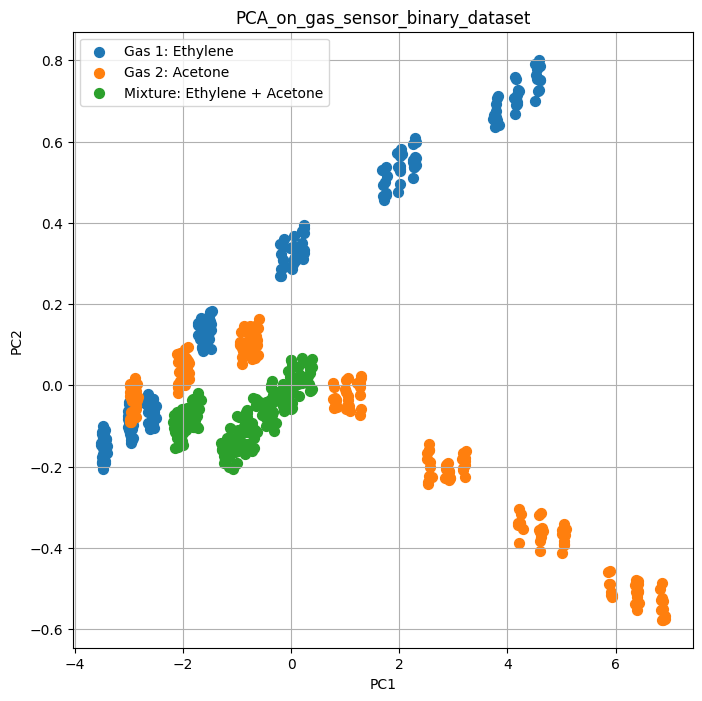

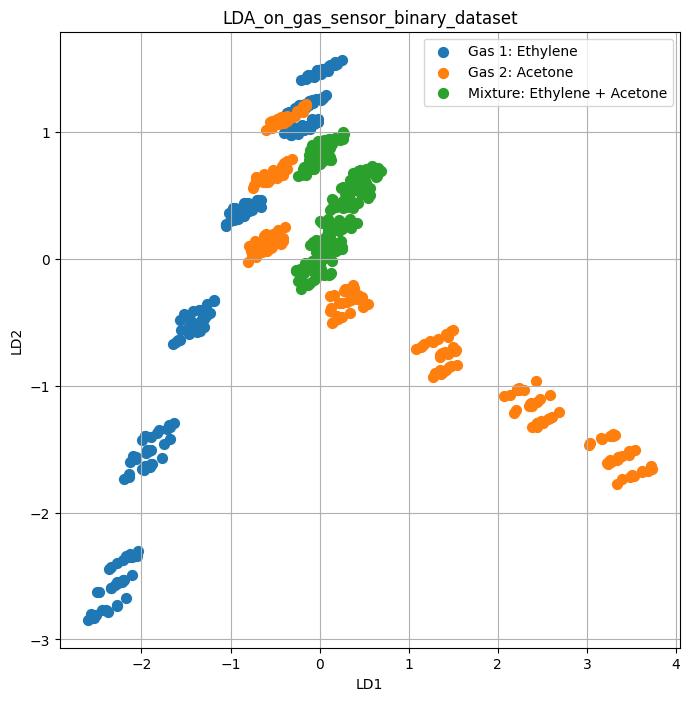

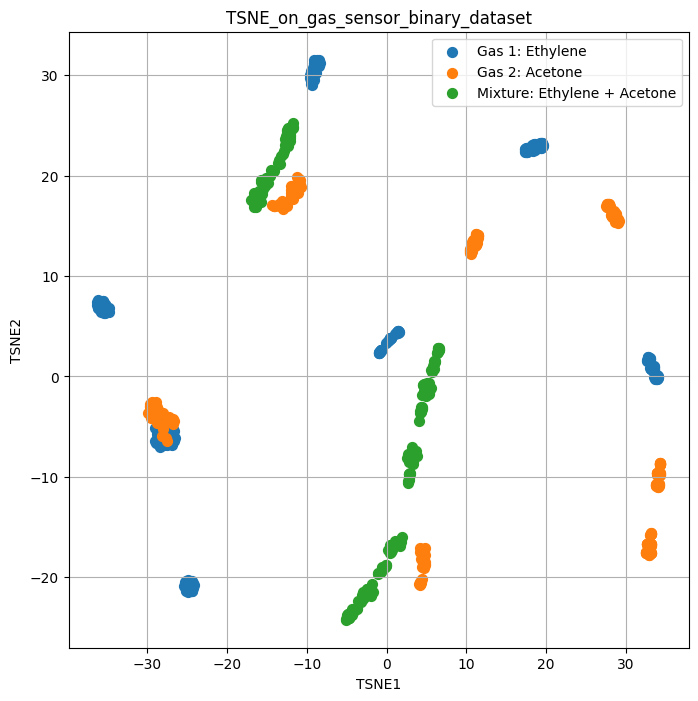

In [6]:
"""
file: pca.py
author: @VincitoreSi
date: 2023-12-16
brief: apply pca to the data
"""


def pca(X_train, n_comp):
    xtrain = PCA(n_components=n_comp).fit_transform(X_train)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.plot(xtrain[0:4208261,0], xtrain[0:4208261,1], xtrain[0:4208261,2], markersize=8, label='ethylene_CO')
    ax.plot(xtrain[1048575:8386765,0], xtrain[1048575:8386765,1], xtrain[1048575:8386765,2], markersize=8, label='ethylene_methane')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA on gas sensor binary dataset")
    ax.legend(loc='upper right')

    # show plot
    # plt.show()
    # save plot to file
    plt.savefig('output/pca2.png')
    
# function to fit PCA on data
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca


# function to get the PCA transformed data
def get_pca_data(pca, data):
    return pd.DataFrame(pca.transform(data), columns=["PC1", "PC2"])


# visualize the data to know if it is separable or not
def visualize_data(data, labels, title, ax_labels):
    fig, ax = plt.subplots(figsize=(8, 8))
    colors = {"tab:blue": 1, "tab:orange": 2, "tab:green": 3}
    for color in colors.keys():
        ax.scatter(
            data.loc[labels == colors[color], ax_labels[0]],
            data.loc[labels == colors[color], ax_labels[1]],
            c=color,
            s=50,
        )
        ax.legend(["Gas 1: Ethylene", "Gas 2: Acetone", "Mixture: Ethylene + Acetone"])
        ax.grid()
        ax.set_xlabel(ax_labels[0])
        ax.set_ylabel(ax_labels[1])
        ax.set_title(title)
    plt.savefig(f'output/images/visualization/{title}.png')
    # plt.show()

def apply_lda(data, labels, n_components):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    lda.fit(data, labels)
    transformed_data = lda.transform(data)
    return pd.DataFrame(transformed_data, columns=["LD1", "LD2"])

def apply_tsne(data, n_components):
    tsne = TSNE(n_components=n_components)
    tsne.fit(data)
    transformed_data = tsne.fit_transform(data)
    return pd.DataFrame(transformed_data, columns=["TSNE1", "TSNE2"])

def main():
    """
    Main function
    """
    # X_train, X_test, y_train, y_test = lead_and_prepare_data()
    X, X_test, y, y_test = load_gas_data('Data/data/expanded_data.csv')
    X, y = np.array(X), np.array(y)
    pc = apply_pca(X, 2)
    pc_data = get_pca_data(pc, X)
    visualize_data(pc_data, y, "PCA_on_gas_sensor_binary_dataset", ["PC1", "PC2"])
    ld = apply_lda(X, y, 2)
    visualize_data(ld, y, "LDA_on_gas_sensor_binary_dataset", ["LD1", "LD2"])
    tsne = apply_tsne(X, 2)
    visualize_data(tsne, y, "TSNE_on_gas_sensor_binary_dataset", ["TSNE1", "TSNE2"])


if __name__ == "__main__":
    main()

## Binary Classification

### AdaBoost Classifier

Loading data...
X shape: (693, 2)
y shape: (693,)
AdaBoost classifier
n_estimators:  100
learning_rate:  1
Training...
Training time: 1.001s
Testing...
Testing time: 0.119s
Accuracy:  0.8857142857142857
Confusion matrix:
Confusion matrix, without normalization
[[22  5  0]
 [ 3 17  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.81 0.19 0.  ]
 [0.15 0.85 0.  ]
 [0.   0.   1.  ]]


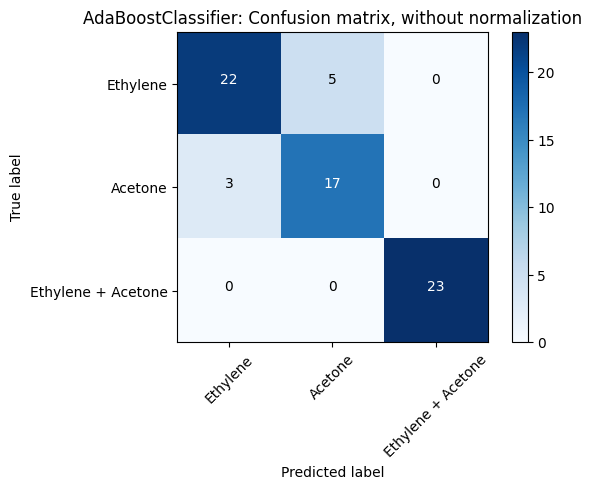

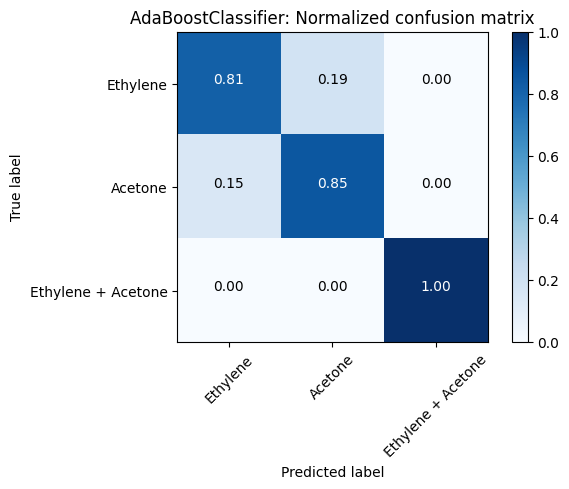

In [7]:
"""
file: adaboost.py
author: @VincitoreSi
date: 2023-12-16
brief: AdaBoost classifier for the binary classification problem
"""

def adaboost(X_train, X_test, y_train, y_test, n_estimators, learning_rate, classes):
    """
    AdaBoost classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param n_estimators: number of estimators
    :param learning_rate: learning rate
    :param max_depth: maximum depth
    :return: AdaBoost classifier
    """
    print("AdaBoost classifier")
    print("n_estimators: ", n_estimators)
    print("learning_rate: ", learning_rate)
    print("Training...")
    start = time.time()
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='AdaBoostClassifier: Confusion matrix, without normalization')
    plt.savefig('output/images/adaboost_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='AdaBoostClassifier: Normalized confusion matrix')
    plt.savefig('output/images/adaboost_cm_normalized.png')
    # plt.show()
    return clf

def main():
    """
    Main function
    """
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    clf = adaboost(X_train, X_test, y_train, y_test, 100, 1, classes)
    
if __name__ == "__main__":
    main()

### KNN

Loading data...
X shape: (693, 2)
y shape: (693,)
KNN classifier
n_neighbors:  14
Training...
Training time: 0.010s
Testing...
Testing time: 0.023s
Accuracy:  1.0
Confusion matrix:
Confusion matrix, without normalization
[[27  0  0]
 [ 0 20  0]
 [ 0  0 23]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


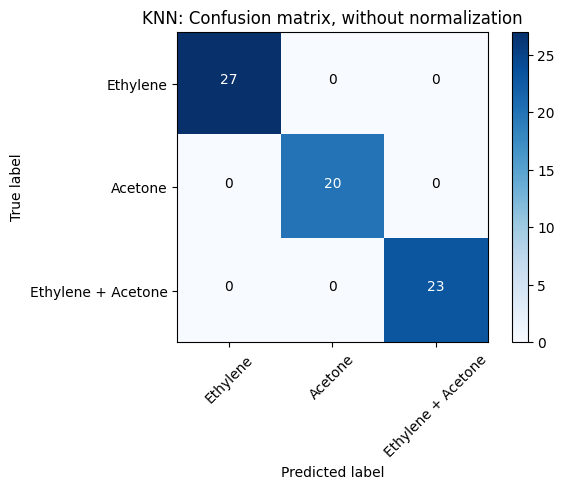

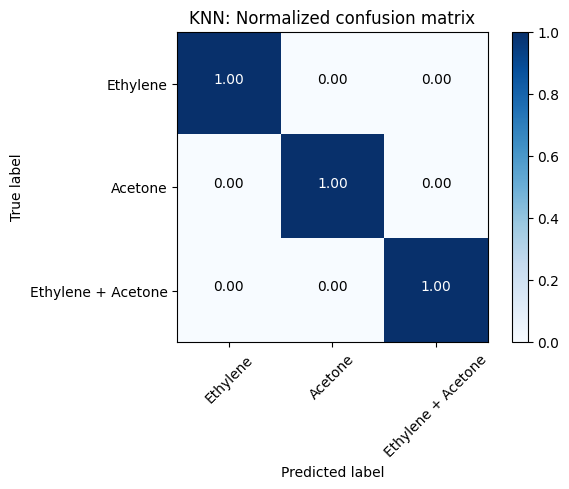

In [8]:
"""
file: knn.py
author: @VincitoreSi
date: 2023-12-16
brief: KNN classifier for the binary classification problem
"""

def knn(X_train, X_test, y_train, y_test, n_neighbors, classes):
    """
    KNN classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param n_neighbors: number of neighbors
    :return: KNN classifier
    """
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    print("KNN classifier")
    print("n_neighbors: ", n_neighbors)
    print("Training...")
    start = time.time()
    knn_clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = knn_clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", knn_clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='KNN: Confusion matrix, without normalization')
    plt.savefig('output/images/knn_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='KNN: Normalized confusion matrix')
    plt.savefig('output/images/knn_cm_normalized.png')
    # plt.show()
    return knn_clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    knn(X_train, X_test, y_train, y_test, 14, classes)

if __name__ == "__main__":
    main()

### LinearSVC

Loading data...
X shape: (693, 2)
y shape: (693,)
LinearSVC classifier
Training...
Training time: 0.180s
Testing...
Testing time: 0.002s
Accuracy:  0.6142857142857143
Confusion matrix:
Confusion matrix, without normalization
[[11  0 16]
 [ 7 13  0]
 [ 0  4 19]]
Normalized confusion matrix
[[0.41 0.   0.59]
 [0.35 0.65 0.  ]
 [0.   0.17 0.83]]


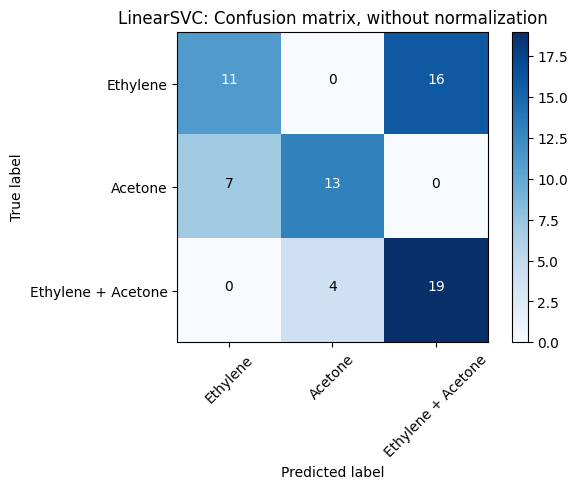

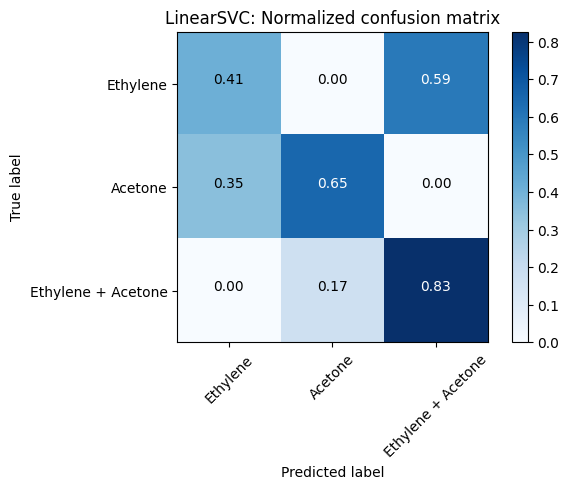

In [9]:
"""
file: linearsvc.py
author: @VincitoreSi
date: 2023-12-16
brief: LinearSVC classifier for the binary classification problem
"""


def linearsvc(X_train, X_test, y_train, y_test, classes):
    """
    LinearSVC classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: LinearSVC classifier
    """
    svc_clf = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge', max_iter=5000, multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)
    print("LinearSVC classifier")
    print("Training...")
    start = time.time()
    svc_clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = svc_clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", svc_clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='LinearSVC: Confusion matrix, without normalization')
    plt.savefig('output/images/linearsvc_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='LinearSVC: Normalized confusion matrix')
    plt.savefig('output/images/linearsvc_cm_normalized.png')
    # plt.show()
    return svc_clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    linearsvc(X_train, X_test, y_train, y_test, classes)

if __name__ == "__main__":
    main()

### Decision Tree

Loading data...
X shape: (693, 2)
y shape: (693,)
Decision Tree classifier
max_depth:  10
Training...
Training time: 0.019s
Testing...
Testing time: 0.003s
Accuracy:  0.9571428571428572
Confusion matrix:
Confusion matrix, without normalization
[[24  3  0]
 [ 0 20  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.89 0.11 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


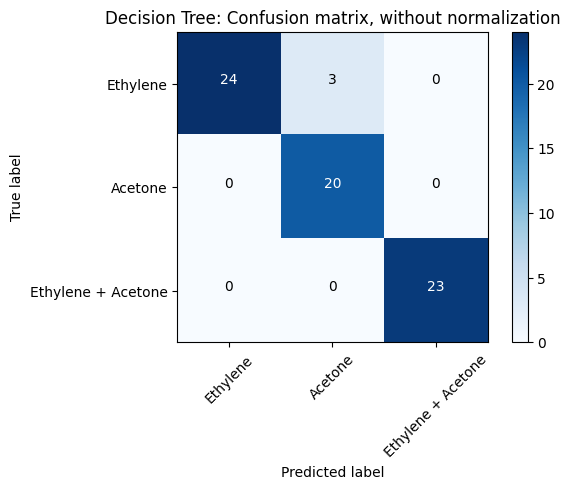

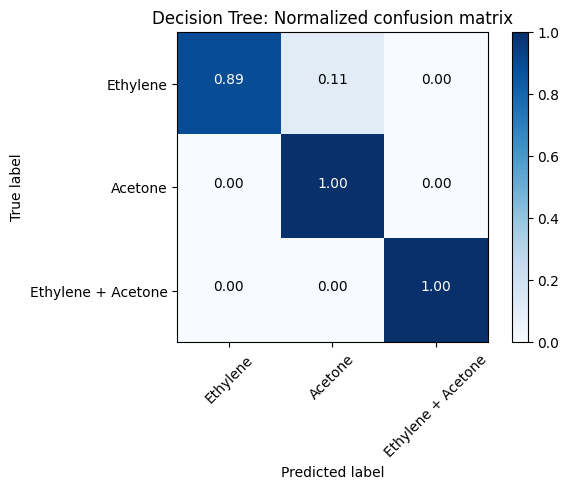

In [10]:
"""
file: decisiontree.py
author: @VincitoreSi
date: 2023-12-16
brief: Decision Tree classifier for the binary classification problem
"""


def decision_tree(X_train, X_test, y_train, y_test, max_depth, classes):
    """
    Decision Tree classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param max_depth: maximum depth
    :return: Decision Tree classifier
    """
    dt_clf = DecisionTreeClassifier(max_depth=max_depth)
    print("Decision Tree classifier")
    print("max_depth: ", max_depth)
    print("Training...")
    start = time.time()
    dt_clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = dt_clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", dt_clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Decision Tree: Confusion matrix, without normalization')
    plt.savefig('output/images/decisiontree_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Decision Tree: Normalized confusion matrix')
    plt.savefig('output/images/decisiontree_cm_normalized.png')
    # plt.show()
    return dt_clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    decision_tree(X_train, X_test, y_train, y_test, 10, classes)

if __name__ == "__main__":
    main()

### Logistic Regression

Loading data...
X shape: (693, 2)
y shape: (693,)
Logistic Regression classifier
Training...
Training time: 0.080s
Testing...
Testing time: 0.003s
Accuracy:  0.7571428571428571
Confusion matrix:
Confusion matrix, without normalization
[[17  0 10]
 [ 7 13  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.63 0.   0.37]
 [0.35 0.65 0.  ]
 [0.   0.   1.  ]]


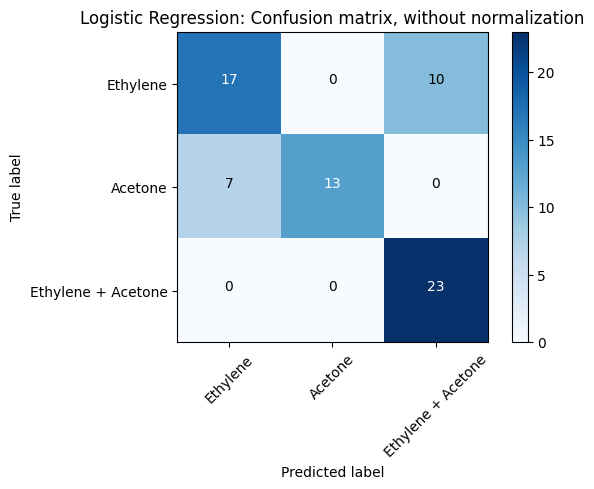

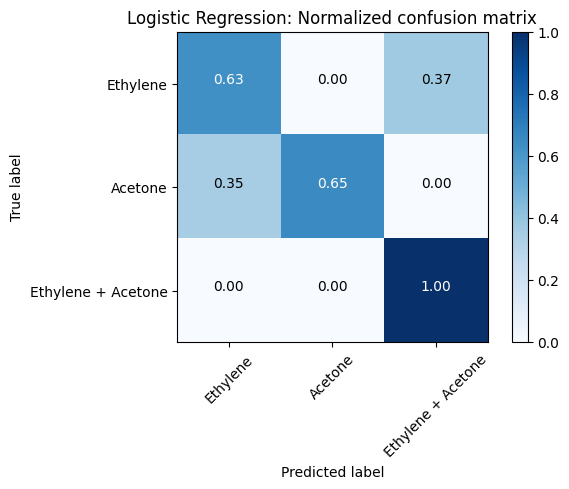

In [11]:
"""
file: logistic.py
author: @VincitoreSi
date: 2023-12-16
brief: Logistic Regression classifier for the binary classification problem
"""

def logistic(X_train, X_test, y_train, y_test, classes):
    """
    Logistic Regression classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: Logistic Regression classifier
    """
    print("Logistic Regression classifier")
    print("Training...")
    start = time.time()
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Logistic Regression: Confusion matrix, without normalization')
    plt.savefig('output/images/logistic_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Logistic Regression: Normalized confusion matrix')
    plt.savefig('output/images/logistic_cm_normalized.png')
    # plt.show()
    return clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    logistic(X_train, X_test, y_train, y_test, classes)

if __name__ == "__main__":
    main()

### Naive Bayes

Loading data...
X shape: (693, 2)
y shape: (693,)
Naive Bayes classifier
Training...
Training time: 0.011s
Testing...
Testing time: 0.009s
Accuracy:  0.8428571428571429
Confusion matrix:
Confusion matrix, without normalization
[[26  1  0]
 [ 4 13  3]
 [ 3  0 20]]
Normalized confusion matrix
[[0.96 0.04 0.  ]
 [0.2  0.65 0.15]
 [0.13 0.   0.87]]


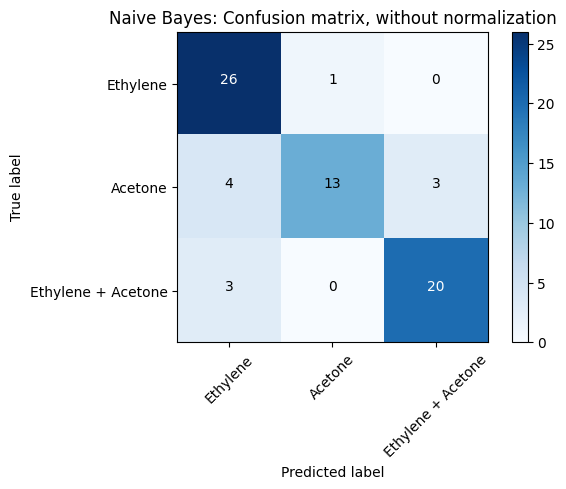

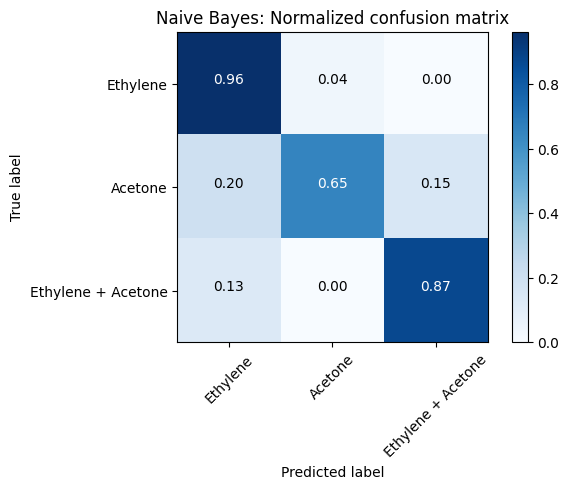

In [12]:
"""
file: naive_bayes.py
author: @VincitoreSi
date: 2023-12-16
brief: Naive Bayes classifier for the binary classification problem
"""

def naive_bayes(X_train, X_test, y_train, y_test, classes):
    """
    Naive Bayes classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: Naive Bayes classifier
    """
    print("Naive Bayes classifier")
    print("Training...")
    start = time.time()
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Naive Bayes: Confusion matrix, without normalization')
    plt.savefig('output/images/naivebayes_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Naive Bayes: Normalized confusion matrix')
    plt.savefig('output/images/naivebayes_cm_normalized.png')
    # plt.show()
    return clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    naive_bayes(X_train, X_test, y_train, y_test, classes)

if __name__ == "__main__":
    main()

### KNN + Bagging

Loading data...
X shape: (693, 2)
y shape: (693,)
Bagging classifier with KNN
n_estimators:  100
max_samples:  0.5
max_features:  0.5
Training...
Training time: 0.859s
Testing...
Testing time: 0.402s
Accuracy:  0.8714285714285714
Confusion matrix:
Confusion matrix, without normalization
[[21  2  4]
 [ 0 17  3]
 [ 0  0 23]]
Normalized confusion matrix
[[0.78 0.07 0.15]
 [0.   0.85 0.15]
 [0.   0.   1.  ]]


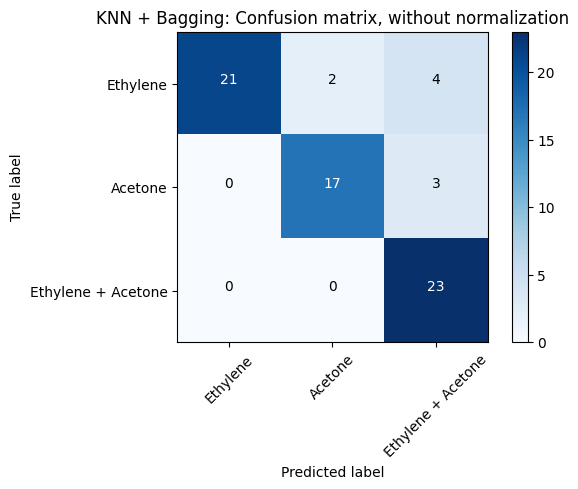

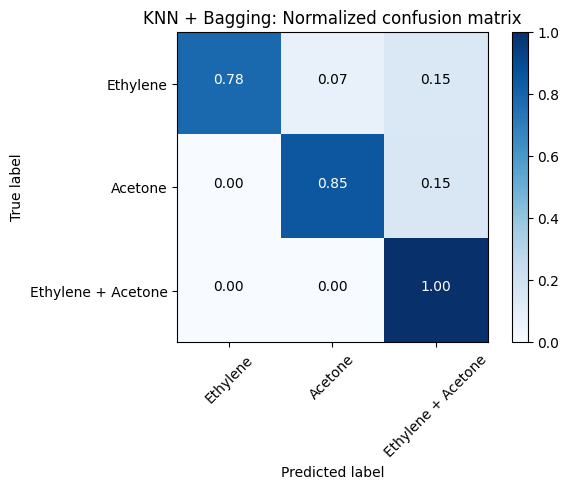

In [13]:
"""
file: baggingknn.py
author: @VincitoreSi
date: 2023-12-16
brief: Bagging classifier with KNN
"""


def bagging_with_knn(X_train, X_test, y_train, y_test, n_estimators, max_samples, max_features, classes):
    """
    This function implements bagging with KNN classifier
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param n_estimators: number of estimators
    :param max_samples: maximum samples
    :param max_features: maximum features
    :return: Bagging classifier with KNN
    """
    bagging_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=14), n_estimators=n_estimators, max_samples=max_samples, max_features=max_features)
    print("Bagging classifier with KNN")
    print("n_estimators: ", n_estimators)
    print("max_samples: ", max_samples)
    print("max_features: ", max_features)
    print("Training...")
    start = time.time()
    bagging_clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = bagging_clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", bagging_clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='KNN + Bagging: Confusion matrix, without normalization')
    plt.savefig('output/images/baggingknn_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='KNN + Bagging: Normalized confusion matrix')
    plt.savefig('output/images/baggingknn_cm_normalized.png')
    # plt.show()
    return bagging_clf


def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    bagging_with_knn(X_train, X_test, y_train, y_test, 100, 0.5, 0.5, classes)

if __name__ == "__main__":
    main()

### Extra Tree


Loading data...
X shape: (693, 2)
y shape: (693,)
Extra Tree classifier
max_depth:  10
Training...
Training time: 0.393s
Testing...
Testing time: 0.023s
Accuracy:  0.9857142857142858
Confusion matrix:
Confusion matrix, without normalization
[[26  1  0]
 [ 0 20  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.96 0.04 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


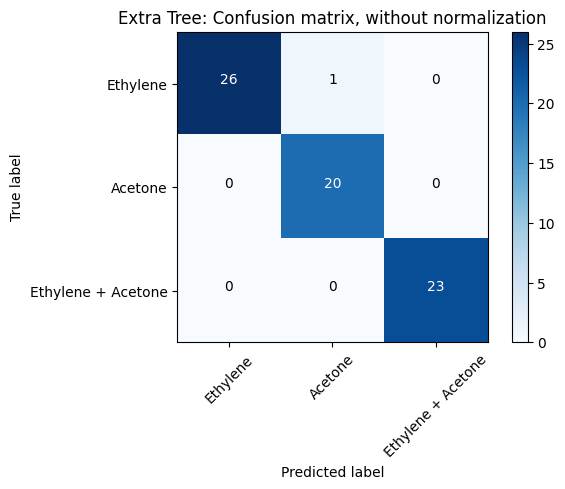

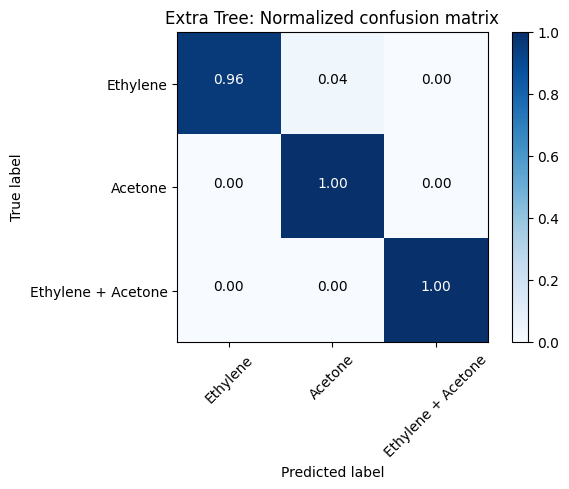

In [14]:
"""
file: extratree.py
author: @VincitoreSi
date: 2023-12-16
brief: Extra Tree classifier for the binary classification problem
"""


def extra_tree(X_train, X_test, y_train, y_test, max_depth, classes):
    """
    Extra Tree classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param max_depth: maximum depth
    :return: Extra Tree classifier
    """
    xt_clf = ExtraTreesClassifier(max_depth=max_depth)
    print("Extra Tree classifier")
    print("max_depth: ", max_depth)
    print("Training...")
    start = time.time()
    xt_clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = xt_clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", xt_clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Extra Tree: Confusion matrix, without normalization')
    plt.savefig('output/images/extratree_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Extra Tree: Normalized confusion matrix')
    plt.savefig('output/images/extratree_cm_normalized.png')
    # plt.show()
    return xt_clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    extra_tree(X_train, X_test, y_train, y_test, 10, classes)

if __name__ == "__main__":
    main()

### Random Forest

Loading data...
X shape: (693, 2)
y shape: (693,)
Random Forest classifier
n_estimators:  100
Training...
Training time: 1.051s
Testing...
Testing time: 0.054s
Accuracy:  0.9571428571428572
Confusion matrix:
Confusion matrix, without normalization
[[24  3  0]
 [ 0 20  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.89 0.11 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


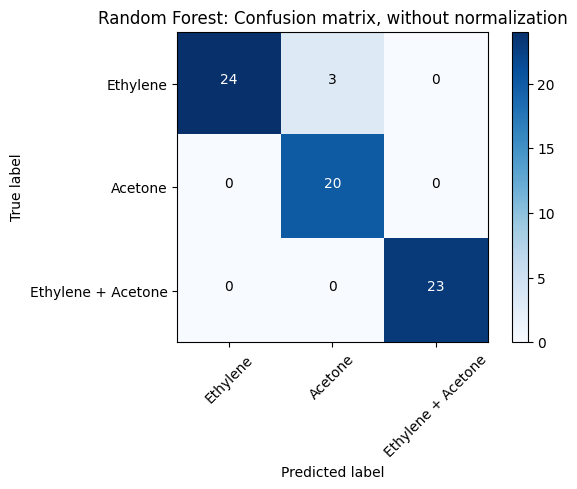

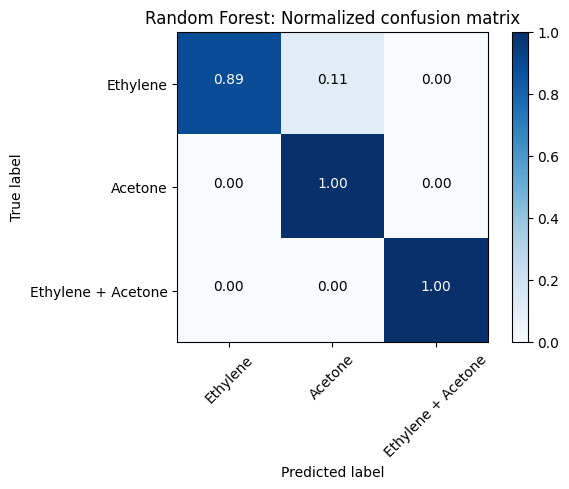

In [15]:
"""
file: random_forest.py
author: @VincitoreSi
date: 2023-12-16
brief: Random Forest classifier for the binary classification problem
"""

def random_forest(X_train, X_test, y_train, y_test, n_estimators, classes):
    """
    Random Forest classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :param n_estimators: number of estimators
    :return: Random Forest classifier
    """
    print("Random Forest classifier")
    print("n_estimators: ", n_estimators)
    print("Training...")
    start = time.time()
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", clf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Random Forest: Confusion matrix, without normalization')
    plt.savefig('output/images/randomforest_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Random Forest: Normalized confusion matrix')
    plt.savefig('output/images/randomforest_cm_normalized.png')
    # plt.show()
    return clf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    random_forest(X_train, X_test, y_train, y_test, 100, classes)

if __name__ == "__main__":
    main()

### Majority Voting

Loading data...
X shape: (693, 2)
y shape: (693,)
Majority voting classifier
Training...
Training time: 0.878s
Testing...
Testing time: 0.101s
Accuracy:  0.8714285714285714
Confusion matrix:
Confusion matrix, without normalization
[[25  0  2]
 [ 7 13  0]
 [ 0  0 23]]
Normalized confusion matrix
[[0.93 0.   0.07]
 [0.35 0.65 0.  ]
 [0.   0.   1.  ]]


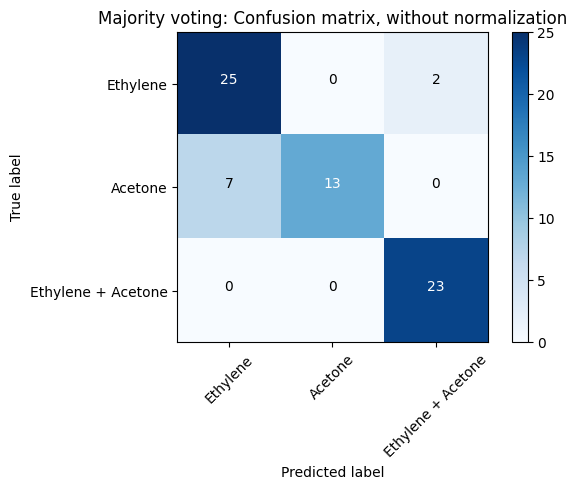

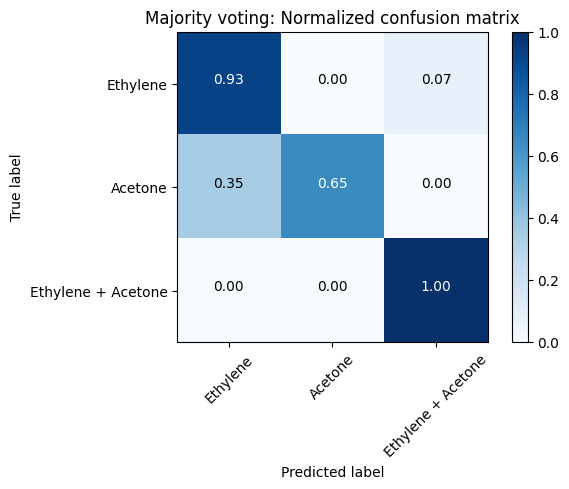

In [16]:
"""
file: voting.py
author: @VincitoreSi
date: 2023-12-16
brief: Voting classifier for the binary classification problem
"""


def majority_voting(X_train, X_test, y_train, y_test, classes):
    """
    Majority voting classifier for the binary classification problem
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: Majority voting classifier
    """
    clf1 = LogisticRegression()
    clf2= DecisionTreeClassifier()
    clf3= LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='squared_hinge', max_iter=5000,
         multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
         verbose=0)
    clf4= KNeighborsClassifier(n_neighbors=30)
    eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svm', clf3),('knn',clf4)], voting='hard')
    eclf = eclf.fit(X_train,y_train)
    y_pred =eclf.predict(X_test)
    print("Majority voting classifier")
    print("Training...")
    start = time.time()
    eclf.fit(X_train, y_train)
    end = time.time()
    print(f"Training time: {(end - start):.3f}s")
    print("Testing...")
    start = time.time()
    y_pred = eclf.predict(X_test)
    end = time.time()
    print(f"Testing time: {(end - start):.3f}s")
    print("Accuracy: ", eclf.score(X_test, y_test))
    print("Confusion matrix:")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    cls = np.unique(y_train)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], title='Majority voting: Confusion matrix, without normalization')
    plt.savefig('output/images/majority_voting_cm.png')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[classes[i] for i in cls], normalize=True, title='Majority voting: Normalized confusion matrix')
    plt.savefig('output/images/majority_voting_cm_normalized.png')
    # plt.show()
    return eclf

def main():
    """The main function"""
    X_train, X_test, y_train, y_test = load_gas_data('Data/data/expanded_data.csv')
    classes = {1: "Ethylene", 2: "Acetone", 3: "Ethylene + Acetone"}
    majority_voting(X_train, X_test, y_train, y_test, classes)

if __name__ == "__main__":
    main()